In [1]:
from RBF import RBFNetwork
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from matplotlib.gridspec import GridSpec
from pylab import cm


In [2]:
vetor1 = np.linspace(0,100,1000)
vetor2 = abs(vetor1 - 100)
vetor = np.hstack((vetor1.reshape(-1,1), vetor2.reshape(-1,1)))

In [3]:
def mape(y_true,y_predicted):
    mape = np.mean(np.abs((y_true - y_predicted)/y_true))*100
    return mape

def relatorio(y_true, y_pred):
    print('MAE:',mean_absolute_error(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true,y_pred))
    print('R²:', r2_score(y_true, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_true,y_pred)))
    print('MAPE:', mape(y_true, y_pred))
    
    
def sw(y_true, y_pred):
    stat, p = shapiro(y_true - y_pred)
    alpha = 0.05
    print(p)
    if p > alpha:
         print("Com 95% de confiança os resíduos são similares a uma distribuição normal segundo o teste de Shapiro-Wilk")
    else:
         print("Com 95% de confiança, os resíduos NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk")
            


def plot_residuos(y_true, y_pred, tamanho, s, alpha, color, label, bins, diretorio):
    
    mae = mean_absolute_error(y_true, y_pred)
    sns.set_style('whitegrid')
    fig = plt.figure(figsize = (tamanho,tamanho - 2))
    gs = GridSpec(4,4)
    
    ax_joint = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])

    ax_joint.scatter(y_true, y_true - y_pred, 
                 s = s, 
                 alpha = alpha, color = color, label = label)
    
    
    ax_joint.hlines(y = 0, xmax = y_pred.max() + 15, xmin = y_pred.min() - 15,
                color = 'black')
    
    
    ax_joint.hlines(y = mae, xmax = y_pred.max() + 15, xmin = y_pred.min() - 15,
                    color = 'black', linestyle = 'dashed')
    
    
    ax_joint.hlines(y = -mae, xmax = y_pred.max() + 15, xmin = y_pred.min() - 15,
                    color = 'black', linestyle = 'dashed', label = 'Erro Médio [K]')
    
    
    ax_marg_y.hist(y_true - y_pred, orientation = 'horizontal', bins = bins, color = color)
    ax_marg_x.hist(y_true, bins = bins, color = color)
    
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    ax_joint.set_xlabel('$T_g$ prevista [K]', fontsize = 15)
    ax_joint.set_ylabel('Resíduos [K]', fontsize = 15)

    ax_joint.set_xlim([y_pred.min() - 15, y_pred.max()+15])

    ax_marg_y.set_xlabel('Quantidade', fontsize = 15)
    ax_marg_x.set_ylabel('Quantidade', fontsize = 15)

    ax_joint.legend(fontsize = 12, fancybox=True, framealpha=1,shadow=True, borderpad=1)

    plt.savefig(diretorio, dpi = 200)

    plt.show()
    
def corr_pearson(y, y_pred,corr, diretorio):
    
    plt.figure(figsize=(9,7))
    plt.scatter(y, y_pred, alpha = 0.8, s = 70, c = 'purple', label = corr)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 
         color = 'black', linestyle = 'dashed')
    plt.xlim([y.min() - 5, y.max() + 5])
    plt.ylim([y.min() - 5, y.max() + 5])

    plt.xlabel('$T_g$ [K]', fontsize = 15)
    plt.ylabel('$T_g$ prevista [K]', fontsize = 15)

    plt.legend(fontsize = 12, fancybox=True,
    framealpha=1,shadow=True, borderpad=1)

    plt.savefig(diretorio, dpi = 200)
    plt.show()
    
    
def corr(y_teste, y_pred):
    dic = {'y1': y_teste, 'y2': y_pred}
    corr = pd.DataFrame(dic).corr()
    return corr


def modelo_mauro(x, tb):
    tg_0 = 543 # TEMPERATURA DO BORATO PURO
    gama = tb/tg_0
    y_pred = []
    
    x1 = (5/2)*((gama-1)/((5*gama) - 2))
    x2 = (31 + (5*gama)) / (38 + (40*gama))
    
    if x <= x1:
        tg = (tg_0/5) * ((5-(4*x))/(1-(2*x)))
    elif x1 < x and x < x2:
        tg = tb
    elif x > x2 or x < 0.5:
        tg = (tg_0/5)*((31-(38*x)) / ((8*x) - 1))
        
    return tg



def pred_modelo_mauro(x,tb):
    y_pred = []
    for i in range(len(x)):
        y_pred.append(modelo_mauro(x[i],tb))
        
    return y_pred



def nq4(x):
    if x <= 1/3:
        nq4 = (2*x) / (5-(4*x))
    elif x > 1/3 or x <= 1/2:
        nq4 = (6-(8*x)) / (31-(38*x))
        
    return nq4

        
def nq3(x):
    if x <= 1/3:
        nq3 = (2-(4*x)) / (5-(4*x))
    elif x > 1/3 or x <= 1/2:
        nq3 = (10-(20*x)) / (31-(38*x))
        
    return nq3
    
def nq2(x):
    if x <= 1/3:
        nq2 = 0
    elif x > 1/3 or x <= 1/2:
        nq2 = ((18*x) - 6) / (31-(38*x))
    
    return nq2


def nq1(x):
    if x <= 1/3:
        nq1 = (3-(2*x)) / (5-(4*x))
    elif x >= 1/3 or x <= 1/2:
        nq1 = (21-(28*x)) / (31-(38*x))
    return nq1
        

In [4]:
diretorio1 = "DADOS LEONARDO/BoroSódio.xlsx"
diretorio2 = "DADOS LEONARDO/BoroLítio.xlsx"
diretorio3 = "DADOS LEONARDO/BoroPotássio.xlsx"
diretorio4 = "DADOS LEONARDO/BoroRubídio.xlsx"
diretorio5 = "DADOS LEONARDO/cesio_novo.xlsx"

diretorio = [diretorio1, diretorio2, diretorio3, diretorio4, diretorio5]
dfs = []
tgs = []
for i in range(len(diretorio)):
    a = pd.read_excel(diretorio[i])['Tg(K)'].dropna()
    dfs.append(a)

for j in range(len(dfs)):
    tgs.append(dfs[j].values)
    
dfs[3] = dfs[3].iloc[0:52]

tgs = list(dfs[0].values) + list(dfs[1].values) + list(dfs[2].values) + list(dfs[3].values) + list(dfs[4].values)

In [5]:
df1 = pd.read_excel(diretorio1)
df1 = df1.sort_values(by='Sodio(mol%)').dropna()[['Sodio(mol%)','Boro(mol%)','Tg(K)']].drop_duplicates('Sodio(mol%)')

df2 = pd.read_excel(diretorio2)
df2 = df2.sort_values(by='Litio(mol%)').dropna()[['Litio(mol%)','Boro(mol%)','Tg(K)']].drop_duplicates('Litio(mol%)')

df3 = pd.read_excel(diretorio3)
df3 = df3.sort_values(by='Potassio(mol%)').dropna()[['Potassio(mol%)','Boro(mol%)','Tg(K)']].drop_duplicates('Potassio(mol%)')

df4 = pd.read_excel(diretorio4)
df4 = df4.dropna().iloc[0:52].sort_values(by='Rubidio(mol%)').drop_duplicates('Rubidio(mol%)') 
df4 = df4[['Rubidio(mol%)', 'Boro(mol%)', 'Tg(K)']]
df4 = df4.drop(index = 52)

df5 = pd.read_excel(diretorio5)
df5 = df5.sort_values(by='Cesio(mol%)').dropna()[['Cesio(mol%)','Boro(mol%)','Tg(K)']].drop_duplicates('Cesio(mol%)')


tgs_novo = list(df1['Tg(K)'].values) + list(df2['Tg(K)'].values) + list(df3['Tg(K)'].values) + list(df4['Tg(K)'].values) + list(df5['Tg(K)'].values)

/home/leonardo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


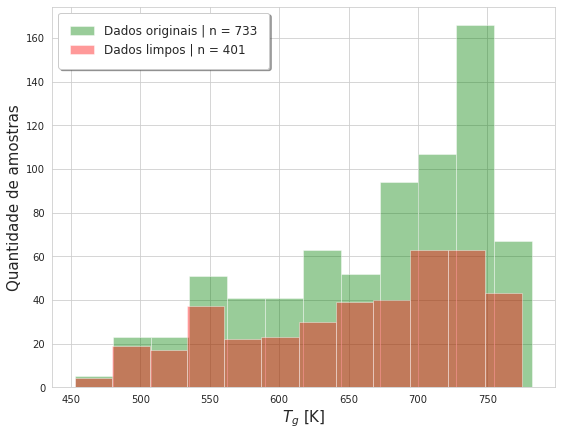

In [6]:
plt.figure(figsize = (9,7))
sns.set_style('whitegrid')
sns.distplot(tgs, bins = 12, color = 'g', kde = False, label = 'Dados originais | n = 733')
sns.distplot(tgs_novo, bins = 12, color = 'r', kde = False, label = 'Dados limpos | n = 401')
plt.xlabel('$T_g$ [K]', fontsize = 15,)
plt.ylabel('Quantidade de amostras', fontsize = 15)

plt.legend(fontsize = 12, fancybox=True,
framealpha=1,shadow=True, borderpad=1)
plt.savefig("imagens_corrigidas/histograma1.png", dpi = 200)
plt.show()


### Borato de Sódio

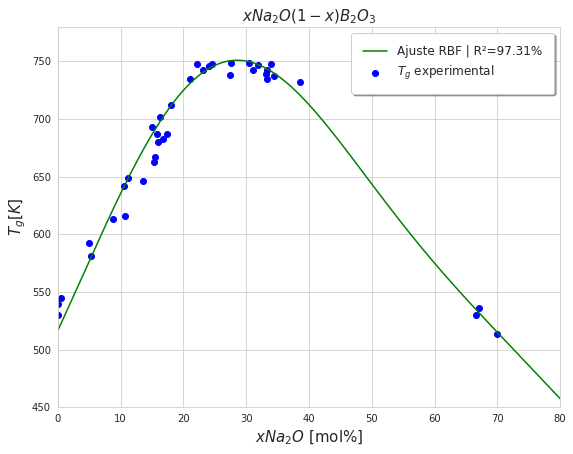

In [7]:
df = pd.read_excel(diretorio1)
df = df.sort_values(by='Sodio(mol%)').dropna()[['Sodio(mol%)','Boro(mol%)','Tg(K)']].drop_duplicates('Sodio(mol%)')


x1 = np.array(df.iloc[:,0:2])
y1 = np.array(df.iloc[:,-1])
x_treino1, x_teste1, y_treino1, y_teste1 = train_test_split(x1,y1, test_size = 0.3, random_state = 45)

n_neuronios = 2
func_ativacao = 4 # GAUSSIANA
n_polos = 200
sinapses1, polos1, y_pred1, sigma1 = RBFNetwork.treinamento(x_treino1,
                                                        y_treino1,
                                                        n_neuronios, 
                                                        func_ativacao, 
                                                        n_polos)



y_pred_teste1 = RBFNetwork.teste(x_teste1, n_neuronios, polos1,sinapses1,4)
ajuste1 = RBFNetwork.teste(vetor,n_neuronios,polos1,sinapses1,4) 

#plt.style.use(['science','no-latex'])
plt.figure(figsize=(9,7))
plt.scatter(x_teste1[:,0], y_teste1, label = '$T_g$ experimental', color = 'b')
#plt.scatter(polos,[500]*n_neuronios)
plt.plot(vetor[:,0], ajuste1, 
         label = "Ajuste RBF | R²={0:.2f}%".format(r2_score(y_teste1, y_pred_teste1)*100),
         color = 'green')
plt.ylabel('$T_g [K]$', fontsize = 15)
plt.xlabel('$xNa_2O$ [mol%]', fontsize = 15)
plt.title('$xNa_2O(1-x)B_2O_3$', fontsize = 15)
plt.xlim([0,80])
plt.ylim([450,780])

plt.legend(fontsize = 12, fancybox=True,
framealpha=1,shadow=True, borderpad=1)
plt.savefig('imagens_corrigidas/borato_de_sodio.png', dpi = 200)
plt.show()

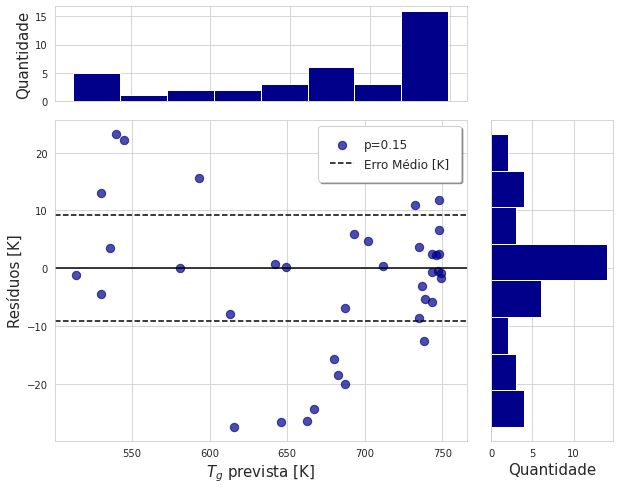

In [8]:
plot_residuos(y_teste1, y_pred_teste1, 10, 70, 0.7, 'darkblue', 'p=0.15', 8, 'imagens_corrigidas/residuos_sodio.png')

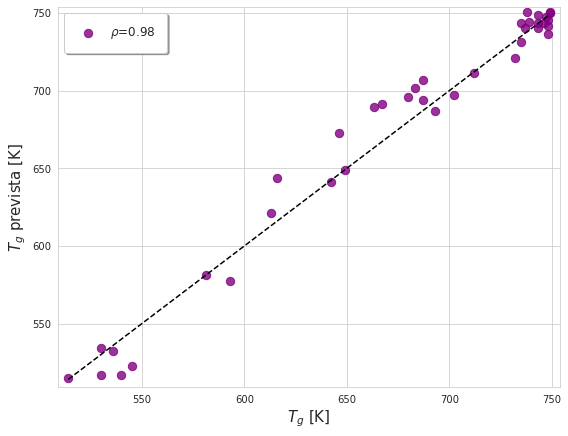

In [9]:
corr_pearson(y_teste1, y_pred_teste1, r'$\rho$=0.98', 'imagens_corrigidas/pearson_sodio.png')

### BORATO DE LÍTIO

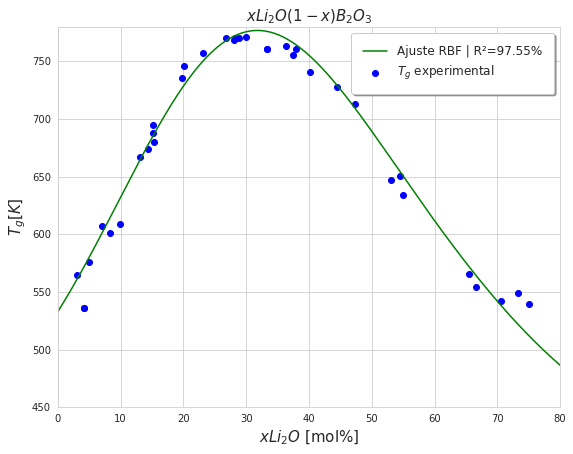

In [10]:
x2 = np.array(df2.iloc[:,0:2])
y2 = np.array(df2.iloc[:,-1])
x_treino2, x_teste2, y_treino2, y_teste2 = train_test_split(x2,y2, test_size = 0.3, random_state = 48)

n_neuronios = 2
func_ativacao = 4 # GAUSSIANA
n_polos = 200
sinapses2, polos2, y_pred2, sigma2 = RBFNetwork.treinamento(x_treino2,
                                                        y_treino2,
                                                        n_neuronios, 
                                                        func_ativacao, 
                                                        n_polos)



y_pred_teste2 = RBFNetwork.teste(x_teste2, n_neuronios, polos2,sinapses2,4)
ajuste2 = RBFNetwork.teste(vetor,n_neuronios,polos2,sinapses2,4) 

sns.set_style('whitegrid')
plt.figure(figsize=(9,7))
plt.scatter(x_teste2[:,0], y_teste2, label = '$T_g$ experimental', color = 'b')
#plt.scatter(polos,[500]*n_neuronios)
plt.plot(vetor[:,0], ajuste2, 
         label = "Ajuste RBF | R²={0:.2f}%".format(r2_score(y_teste2, y_pred_teste2)*100),
         color = 'green')
plt.ylabel('$T_g [K]$', fontsize = 15)
plt.xlabel('$xLi_2O$ [mol%]', fontsize = 15)
plt.title('$xLi_2O(1-x)B_2O_3$', fontsize = 15)
plt.xlim([0,80])
plt.ylim([450,780])

plt.legend(fontsize = 12, fancybox=True,
framealpha=1,shadow=True, borderpad=1)
plt.savefig('imagens_corrigidas/borato_de_litio.png', dpi = 200)
plt.show()

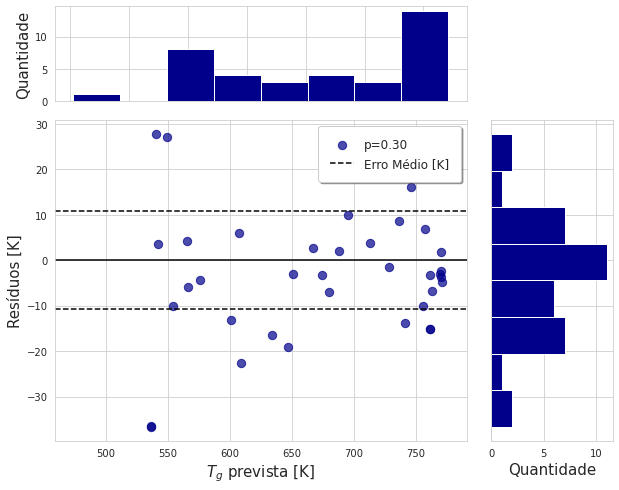

In [11]:
plot_residuos(y_teste2, y_pred_teste2, 10, 70, 0.7, 'darkblue', 'p=0.30', 8, 'imagens_corrigidas/residuos_litio.png')

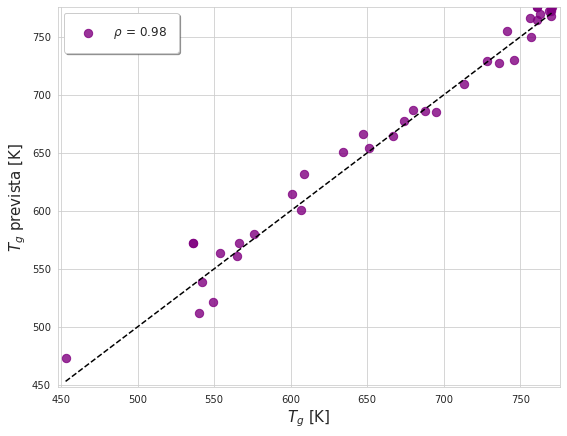

In [12]:
corr_pearson(y_teste2, y_pred_teste2,r' $\rho$ = 0.98', 'imagens_corrigidas/pearson_litio.png')

### BORATO DE POTÁSSIO

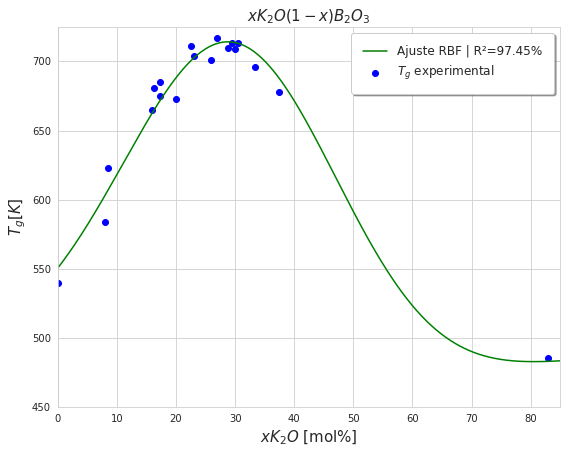

In [13]:
x3 = np.array(df3.iloc[:,0:2])
y3 = np.array(df3.iloc[:,-1])
x_treino3, x_teste3, y_treino3, y_teste3 = train_test_split(x3,y3, test_size = 0.3, random_state = 40)

n_neuronios = 2
func_ativacao = 4 # GAUSSIANA
n_polos = 200
sinapses3, polos3, y_pred3, sigma3 = RBFNetwork.treinamento(x_treino3,
                                                        y_treino3,
                                                        n_neuronios, 
                                                        func_ativacao, 
                                                        n_polos)



y_pred_teste3 = RBFNetwork.teste(x_teste3, n_neuronios, polos3,sinapses3,4)
ajuste3 = RBFNetwork.teste(vetor,n_neuronios,polos3,sinapses3,4) 

sns.set_style('whitegrid')
plt.figure(figsize=(9,7))
plt.scatter(x_teste3[:,0], y_teste3, label = '$T_g$ experimental', color = 'b')
#plt.scatter(polos,[500]*n_neuronios)
plt.plot(vetor[:,0], ajuste3, 
         label = "Ajuste RBF | R²={0:.2f}%".format(r2_score(y_teste3, y_pred_teste3)*100),
         color = 'green')
plt.ylabel('$T_g [K]$', fontsize = 15)
plt.xlabel('$xK_2O$ [mol%]', fontsize = 15)
plt.title('$xK_2O(1-x)B_2O_3$', fontsize = 15)
plt.xlim([0,85])
plt.ylim([450,725])

plt.legend(fontsize = 12, fancybox=True,
framealpha=1,shadow=True, borderpad=1)
plt.savefig('imagens_corrigidas/borato_de_potassio.png', dpi = 200)
plt.show()

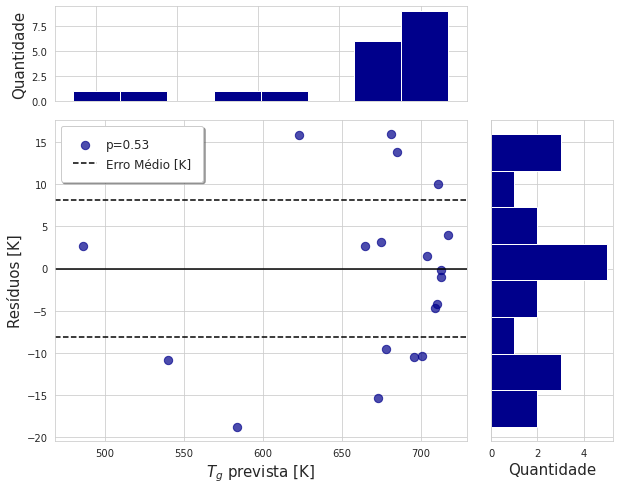

In [14]:
plot_residuos(y_teste3, y_pred_teste3, 10, 70, 0.7, 'darkblue', 'p=0.53', 8, 'imagens_corrigidas/residuos_potassio.png')

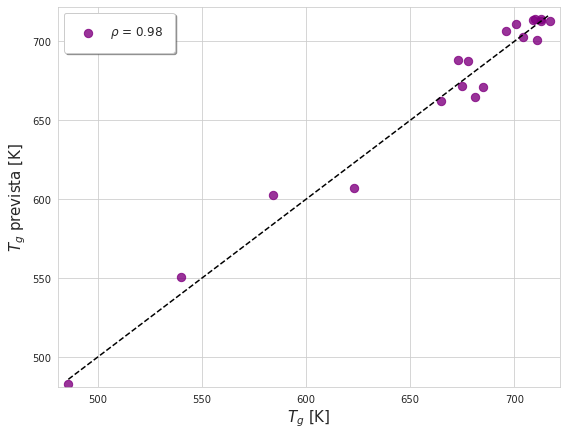

In [15]:
corr_pearson(y_teste3, y_pred_teste3, r'$\rho$ = 0.98', 'imagens_corrigidas/pearson_potassio.png')

### BORATO DE CÉSIO

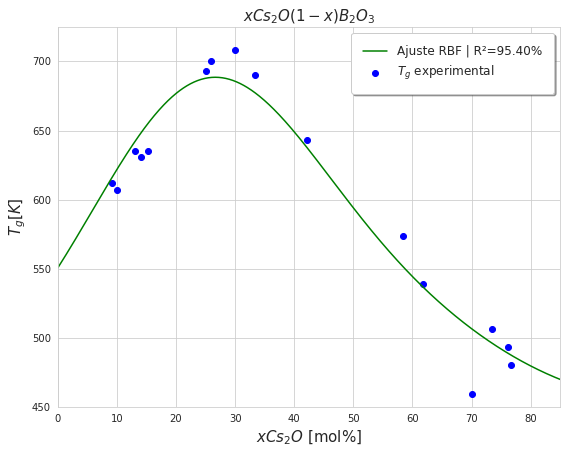

In [16]:
x5 = np.array(df5.iloc[:,0:2])
y5 = np.array(df5.iloc[:,-1])
x_treino5, x_teste5, y_treino5, y_teste5 = train_test_split(x5,y5, test_size = 0.3, random_state = 42)

n_neuronios = 2
func_ativacao = 4 # GAUSSIANA
n_polos = 200
sinapses5, polos5, y_pred5, sigma5 = RBFNetwork.treinamento(x_treino5,
                                                        y_treino5,
                                                        n_neuronios, 
                                                        func_ativacao, 
                                                        n_polos)



y_pred_teste5 = RBFNetwork.teste(x_teste5, n_neuronios, polos5,sinapses5,4)
ajuste5 = RBFNetwork.teste(vetor,n_neuronios,polos5,sinapses5,4) 

sns.set_style('whitegrid')
plt.figure(figsize=(9,7))
plt.scatter(x_teste5[:,0], y_teste5, label = '$T_g$ experimental', color = 'b')
#plt.scatter(polos,[500]*n_neuronios)
plt.plot(vetor[:,0], ajuste5, 
         label = "Ajuste RBF | R²={0:.2f}%".format(r2_score(y_teste5, y_pred_teste5)*100),
         color = 'green')
plt.ylabel('$T_g [K]$', fontsize = 15)
plt.xlabel('$xCs_2O$ [mol%]', fontsize = 15)
plt.title('$xCs_2O(1-x)B_2O_3$', fontsize = 15)
plt.xlim([0,85])
plt.ylim([450,725])

plt.legend(fontsize = 12, fancybox=True,
framealpha=1,shadow=True, borderpad=1)
plt.savefig('imagens_corrigidas/borato_de_cesio.png', dpi = 200)
plt.show()

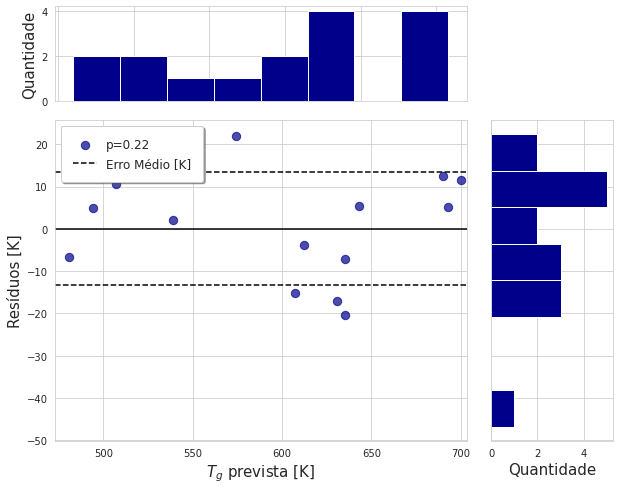

In [17]:
plot_residuos(y_teste5, y_pred_teste5, 10, 70, 0.7, 'darkblue', 'p=0.22', 8, 'imagens_corrigidas/residuos_cesio.png')

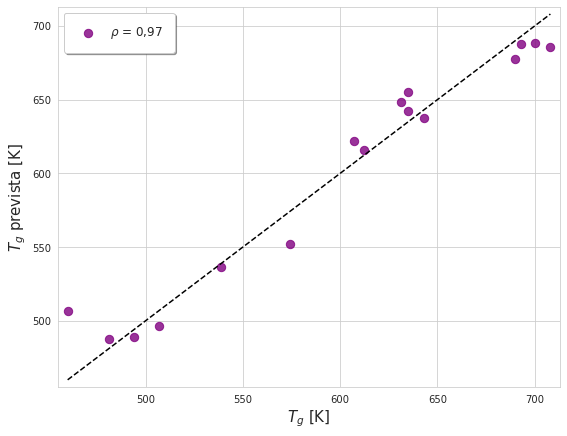

In [18]:
corr_pearson(y_teste5, y_pred_teste5, r'$\rho$ = 0,97', 'imagens_corrigidas/pearson_cesio.png')

### BORATO DE RUBÍDIO

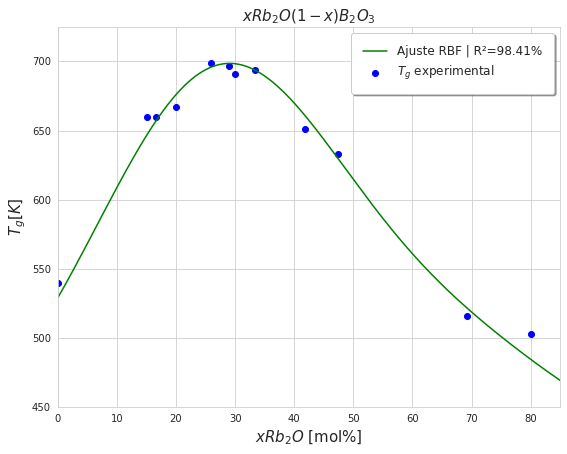

In [19]:
x4 = np.array(df4.iloc[:,0:2])
y4 = np.array(df4.iloc[:,-1])
x_treino4, x_teste4, y_treino4, y_teste4 = train_test_split(x4,y4, test_size = 0.3, random_state = 45)

n_neuronios = 2
func_ativacao = 4 # GAUSSIANA
n_polos = 200
sinapses4, polos4, y_pred4, sigma4 = RBFNetwork.treinamento(x_treino4,
                                                        y_treino4,
                                                        n_neuronios, 
                                                        func_ativacao, 
                                                        n_polos)



y_pred_teste4 = RBFNetwork.teste(x_teste4, n_neuronios, polos4,sinapses4,4)
ajuste4 = RBFNetwork.teste(vetor,n_neuronios,polos4,sinapses4,4) 

sns.set_style('whitegrid')
plt.figure(figsize=(9,7))
plt.scatter(x_teste4[:,0], y_teste4, label = '$T_g$ experimental', color = 'b')
#plt.scatter(polos,[500]*n_neuronios)
plt.plot(vetor[:,0], ajuste4, 
         label = "Ajuste RBF | R²={0:.2f}%".format(r2_score(y_teste4, y_pred_teste4)*100),
         color = 'green')
plt.ylabel('$T_g [K]$', fontsize = 15)
plt.xlabel('$xRb_2O$ [mol%]', fontsize = 15)
plt.title('$xRb_2O(1-x)B_2O_3$', fontsize = 15)
plt.xlim([0,85])
plt.ylim([450,725])

plt.legend(fontsize = 12, fancybox=True,
framealpha=1,shadow=True, borderpad=1)
plt.savefig('imagens_corrigidas/borato_de_rubidio.png', dpi = 200)
plt.show()

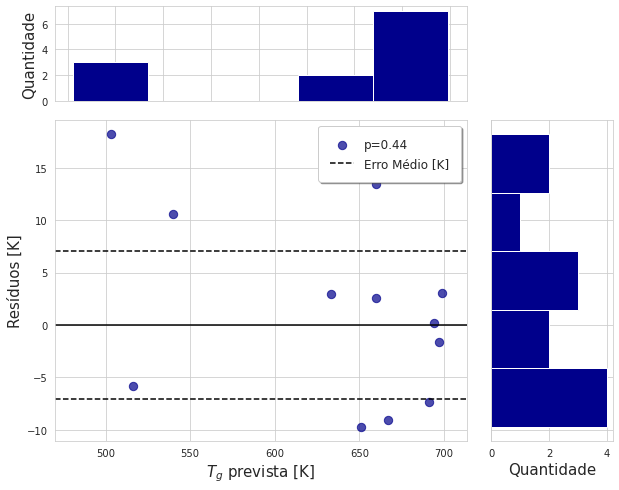

In [20]:
plot_residuos(y_teste4, y_pred_teste4, 10, 70, 0.7, 'darkblue', 'p=0.44', 5, 'imagens_corrigidas/residuos_rubidio.png')

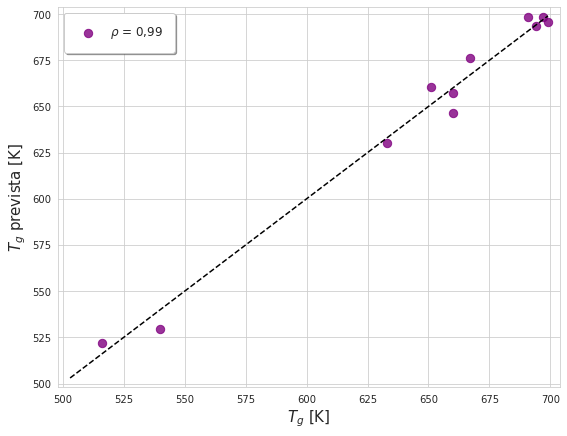

In [21]:
corr_pearson(y_teste4, y_pred_teste4, r'$\rho$ = 0,99', 'imagens_corrigidas/pearson_rubidio.png')

### TODOS OS AJUSTES AGRUPADOS

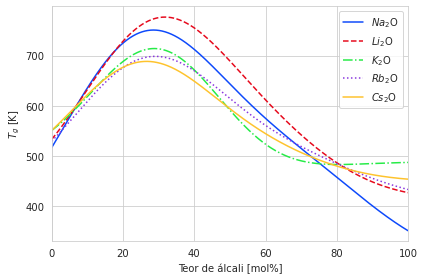

In [22]:
plt.style.use(['high-vis', 'no-latex'])

plt.plot(vetor[:,0], ajuste1, label = '$Na_2$O')
plt.plot(vetor[:,0], ajuste2, label = '$Li_2$O')
plt.plot(vetor[:,0], ajuste3, label = '$K_2$O')
plt.plot(vetor[:,0], ajuste4, label = '$Rb_2$O')
plt.plot(vetor[:,0], ajuste5, label = '$Cs_2$O')

plt.xlim([0,100])
plt.xlabel('Teor de álcali [mol%]')
plt.ylabel('$T_g$ [K]')

plt.legend()
plt.savefig('imagens_corrigidas/todos_ajustes.png', dpi = 200)
plt.tight_layout()
plt.show()

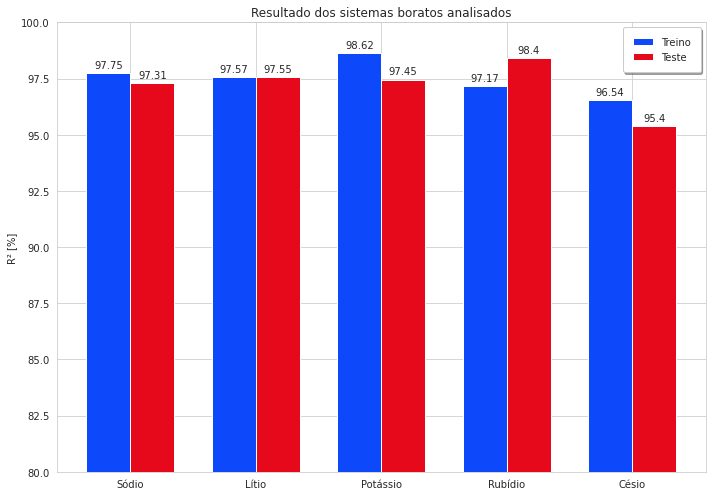

In [23]:
labels = ['Sódio', 'Lítio','Potássio','Rubídio','Césio']
treino = [97.75, 97.57, 98.62, 97.17, 96.54]
teste = [97.31, 97.55, 97.45, 98.40, 95.40]

x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots(figsize = (10,7))

rects1 = ax.bar(x - width/2, treino, width, label='Treino')
rects2 = ax.bar(x + width/2, teste, width, label='Teste')

ax.set_ylabel('R² [%]')
ax.set_title('Resultado dos sistemas boratos analisados')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([80,100])
ax.legend(fontsize = 10, fancybox=True, framealpha=1,shadow=True, borderpad=1)

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


plt.savefig('imagens_corrigidas/resultados.png')

plt.show()


In [24]:
coeficientes = {'Na': sinapses1,
                'Li': sinapses2,
                'K': sinapses3,
                'Rb': sinapses4,
                'Cs': sinapses5}
rotulos = ['w1', 'w2', 'w0']
    
pesos_resultados = pd.DataFrame(coeficientes, index = rotulos)
pesos_resultados

,Na,Li,K,Rb,Cs
w1,176.579627,333.398294,-42.872480,78.725132,95.952768
w2,586.252726,304.218521,244.469464,369.852764,225.837046
w0,283.637234,413.583226,488.525994,409.746725,448.899762


In [25]:
index = ['$\sigma_{Na}$','$\sigma_{Li}$','$\sigma_{K}$','$\sigma_{Rb}$','$\sigma_{Cs}$']
sigmas = pd.DataFrame([sigma1,sigma2, sigma3, sigma4, sigma5], index = index, columns = ['$\sigma$'])
sigmas 

,$\sigma$
$\sigma_{Na}$,31.810202
$\sigma_{Li}$,28.025833
$\sigma_{K}$,25.852086
$\sigma_{Rb}$,29.575601
$\sigma_{Cs}$,27.440307


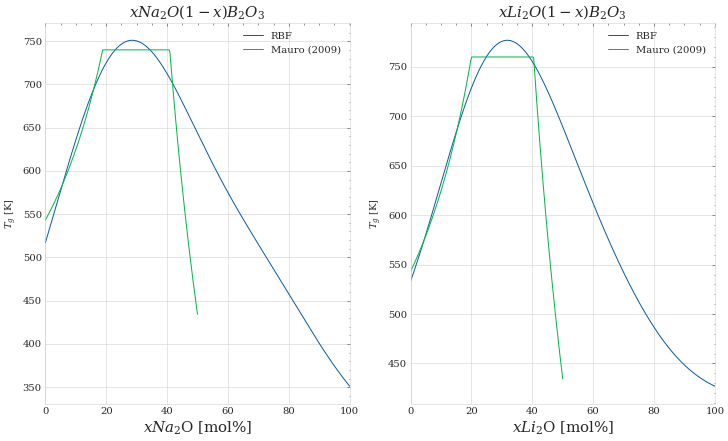

In [29]:
plt.style.use(['science', 'no-latex'])
plt.figure(figsize=(12, 7))
x = np.linspace(0,0.5,200)
y_mauro_sodio = pred_modelo_mauro(x,740)
y_mauro_litio = pred_modelo_mauro(x,760)

plt.subplot(1, 2, 1)
plt.plot(vetor[:,0],ajuste1, label = 'RBF')
plt.plot(x*100,y_mauro_sodio, label = 'Mauro (2009)')
plt.xlim([0,100])
plt.title('$xNa_2O(1-x)B_2O_3$', fontsize = 15)
plt.ylabel('$T_g$ [K]')
plt.xlabel('$xNa_2$O [mol%]', fontsize = 15)
plt.legend()



plt.subplot(1, 2, 2)
plt.plot(vetor[:,0],ajuste2, label = 'RBF')
plt.plot(x*100,y_mauro_litio, label = 'Mauro (2009)')
plt.xlim([0,100])
plt.title('$xLi_2O(1-x)B_2O_3$', fontsize = 15)
plt.ylabel('$T_g$ [K]')
plt.xlabel('$xLi_2$O [mol%]', fontsize = 15)
plt.legend()


plt.savefig('imagens_corrigidas/modelo_mauro.png', dpi = 200)
plt.show()

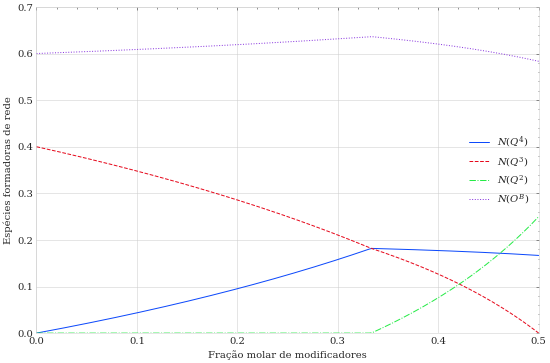

In [30]:
n4 = []
n3 = []
n2 = []
n1 = []
for i in range(len(x)):
    n4.append(nq4(x[i]))
    n3.append(nq3(x[i]))
    n2.append(nq2(x[i]))
    n1.append(nq1(x[i]))
    
  
plt.style.use(['high-vis', 'no-latex'])

plt.figure(figsize = (9,6))   
plt.plot(x,n4, label = '$N(Q^{4})$')
plt.plot(x,n3, label = '$N(Q^{3})$')
plt.plot(x,n2, label = '$N(Q^{2})$')
plt.plot(x,n1, label = '$N(O^{B})$')
plt.xlabel('Fração molar de modificadores')
plt.ylabel('Espécies formadoras de rede')
plt.xlim([0,0.5])
plt.ylim([0,0.7])
plt.legend()
plt.savefig('imagens_corrigidas/estruturas.png', dpi = 200)
plt.show()